## Assignment A2a: Signal Detection
## Name: Ziming Cui
## Case ID: zxc701

### 1. Generating signals with events and additive noise

### 1a. Randomly occurring events in Gaussian noise

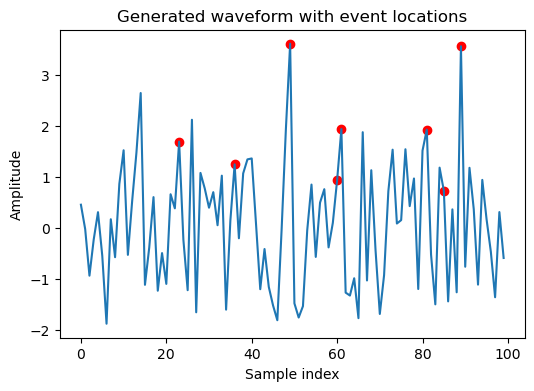

In [16]:
###########################1a
import numpy as np
import matplotlib.pyplot as plt

def genwaveform(N = 100, alpha = 0.05, A = 2, sigma = 1):
    waveform = np.random.normal(0, sigma, N) 
    event_locations = np.random.binomial(1, alpha, N) 
    event_locations = np.where(event_locations == 1)[0] 
    waveform[event_locations] += A 
    return waveform, event_locations

def plot_waveform(waveform, event_locations):
    plt.figure(figsize = (6,4))
    plt.plot(waveform)
    plt.scatter(event_locations, 
                np.ones(len(event_locations))*waveform[event_locations], 
                c='red')
    plt.xlabel("Sample index")
    plt.ylabel("Amplitude")
    plt.title("Generated waveform with event locations")
    plt.show()

waveform, event_locations = genwaveform()
plot_waveform(waveform, event_locations)

### 1b. Signals in uniform noise

#### Uniform noise example

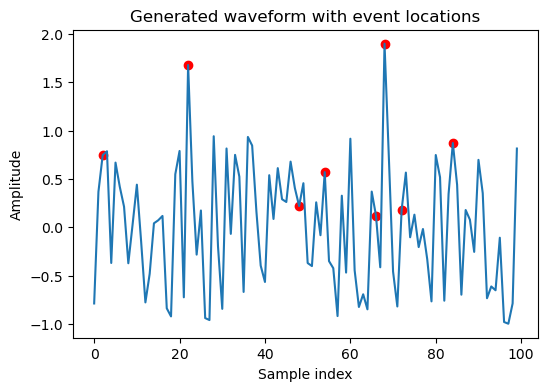

In [2]:
############################1b
import numpy as np
import matplotlib.pyplot as plt

def genwaveform(N = 100, alpha = 0.1, A=1, sigma=1, noisetype='Gaussian'):
    if noisetype == 'Gaussian':
        noise = np.random.normal(0, sigma, N) 
    elif noisetype == 'Uniform':
        noise = np.random.uniform(-sigma/2, sigma/2, N) #range [-σ/2, σ/2)
    else:
        raise ValueError("Invalid noise type. Choose either 'Gaussian' or 'Uniform'.")
        
    waveform = noise # Set the waveform equal to the noise
    event_locations = np.random.binomial(1, alpha, N) #
    event_locations = np.where(event_locations == 1)[0] # Get the indices where events occur
    waveform[event_locations] += A # Add event amplitude to the waveform at event locations
    return waveform, event_locations

def plot_waveform(waveform, event_locations):
    plt.figure(figsize = (6,4))
    plt.plot(waveform)
    plt.scatter(event_locations, np.ones(len(event_locations))*waveform[event_locations], c='red')
    plt.xlabel("Sample index")
    plt.ylabel("Amplitude")
    plt.title("Generated waveform with event locations")
    plt.show()

waveform, event_locations = genwaveform(N=100, alpha=0.05, A=1, sigma=2, noisetype='Uniform')
plot_waveform(waveform, event_locations)

#### Gaussian noise example

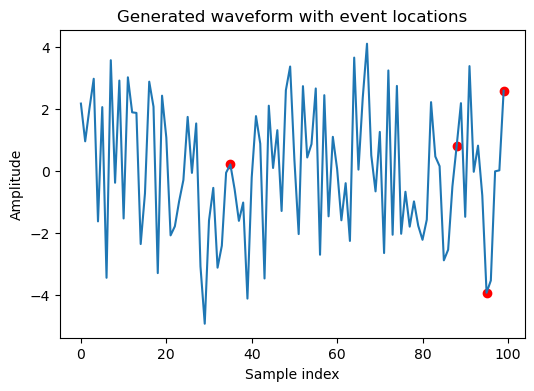

In [3]:
waveform1, event_locations1 = genwaveform(N=100, alpha=0.05, A=1, sigma=2, noisetype='Gaussian')
plot_waveform(waveform1, event_locations1)

### 1c. Notation
Write an equation to express the signal $x[t]$ as a sum of $N$ events of amplitude $A$ that occur at times $\tau_i$.  Also write an expression to indicate that the noise $\epsilon[t]$ is distributed according to a Normal with mean $\mu$ and variance $\sigma^2$.

$$
x[t] = A\displaystyle\sum_{i=1}^N\delta[t - \tau_i]
$$

$$
\epsilon[t] \sim N(\mu, \sigma^2)
$$

### 1d. Conditional probability
What is the expression for the probability distribution of the waveform at time $t$ given that there is a signal?

Where $T = [\tau_1,...,\tau_N]$ :
$$p(y[t]t \in T) = N(\mu + A, \sigma^2)$$
Or when signal present :
$$\,y[t] \sim N(\mu+A,\sigma^2)$$

## 2. Signal detection

### 2a. Effect of parameters on detection probability

Explain what effect the parameters and type of noise have on detection probability.  For what values does the probability reduce to pure chance?  Or become certain (i.e. approach 1)?  Explain your reasoning and illustrate with plots.

### Answer
The parameters that influence the detection probability are event probability (α), event amplitude (A), and the standard deviation of the noise (σ). The type of noise (Gaussian or uniform) also affects the detection probability.

In general, a higher event probability (α) will result in a higher probability of detecting an event in the waveform. This is because more events will be present in the waveform, making it easier to identify the signal. Similarly, increasing the event amplitude (A) will increase the detection probability, as the signal will stand out more against the background noise.

The standard deviation of the noise (σ) also affects the detection probability. A higher standard deviation of the noise will result in a higher probability of detection, as the signal will stand out more against the increased noise. However, if the standard deviation is too high, it can become difficult to detect the signal at all. In the case of Gaussian noise, the detection probability reduces to pure chance when the signal is weaker than the noise. In the case of uniform noise, the detection probability reduces to pure chance when the signal is smaller than the width of the uniform distribution.

In both cases, the detection probability becomes certain when the signal is significantly stronger than the noise. This can be achieved by increasing the event amplitude (A) or decreasing the standard deviation of the noise (σ).

To visualize the effect of these parameters on the detection probability, we can plot multiple waveforms generated using different values of these parameters and observe how the signal-to-noise ratio affects the visibility of the signal.

### Showing high and low SNRs.

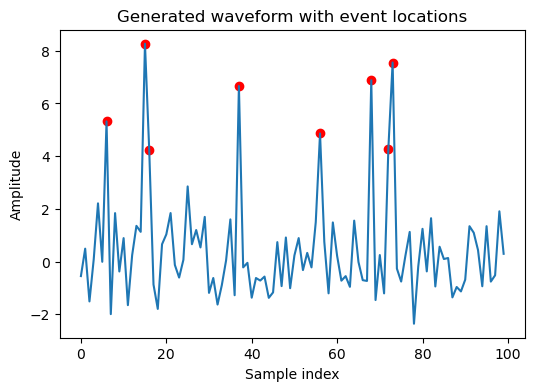

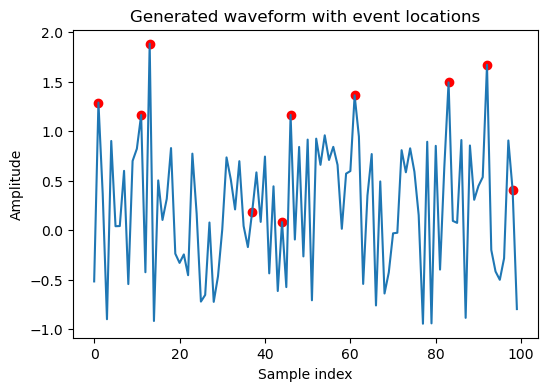

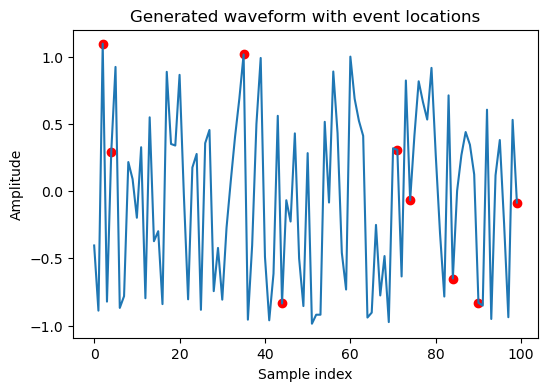

In [4]:
import numpy as np
import matplotlib.pyplot as plt

waveform1, event_locations1 = genwaveform(N=100, alpha=0.1, A=6, sigma=1, noisetype='Gaussian')
plot_waveform(waveform1, event_locations1)

waveform, event_locations = genwaveform(N=100, alpha=0.1, A=1, sigma=2, noisetype='Uniform')
plot_waveform(waveform, event_locations)

waveform2, event_locations2 = genwaveform(N=100, alpha=0.1, A=0.1, sigma=2, noisetype='Uniform')
plot_waveform(waveform2, event_locations2)

### 2b. Types of detections and detection errors

In [5]:
from collections import namedtuple
import matplotlib.pyplot as plt

def detectioncounts(si, y, sigma):
    tp = np.sum(y[si] > sigma) # Count of true positives
    fn = np.sum(y[si] <= sigma) # Count of false negatives
    fp = np.sum((y > sigma) & (np.isin(np.arange(len(y)), si, invert=True))) 
    tn = np.sum((y <= sigma) & (np.isin(np.arange(len(y)), si, invert=True))) 
    return namedtuple('DetectionCounts', ['tp', 'fn', 'fp', 'tn'])(tp, fn, fp, tn)

def plot_detection(si, y, sigma):
    plt.figure(figsize = (6,4))
    tp, fn, fp, tn = detectioncounts(si, y, sigma)  
    x=np.linspace(0,len(y),len(y),endpoint=True)
    for i in range(x.size):
        plt.plot([i,i],[0,y[i]],linestyle='-',color='Blue')
    plt.axhline(sigma, color='red')
    plt.scatter(si[y[si] > sigma], y[si][y[si] > sigma], c='green', label='True positives')
    plt.scatter(si[y[si] <= sigma], y[si][y[si] <= sigma], c='orange', label='False negatives')
    plt.scatter(np.where((y > sigma) & (np.isin(np.arange(len(y)), si, invert=True)))[0], 
                y[(y > sigma) & (np.isin(np.arange(len(y)), si, invert=True))], c='purple',
                label='False positives')
    plt.xlabel('Sample index')
    plt.ylabel('Amplitude')
    plt.title('Detection Results')
    plt.legend(loc = "upper right")
    plt.show()



tp = 5 , fn = 1 , fp = 7 , tn = 37


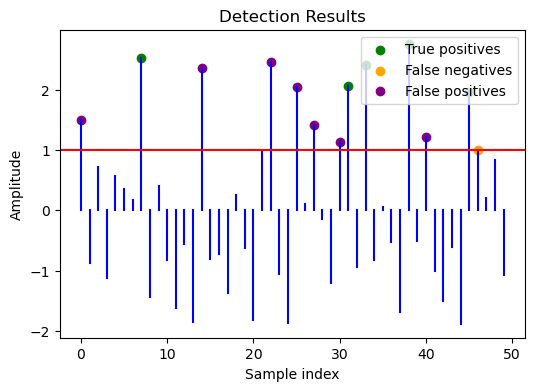

In [13]:
waveform, event_locations = genwaveform(N=50, alpha=0.1, A=2, sigma=1, noisetype='Gaussian')
tp, fn, fp, tn = detectioncounts(event_locations, waveform, 1)
print("tp =",tp,", fn =",fn,", fp =",fp,", tn =",tn)
plot_detection(event_locations, waveform, 1)

### Use reference data ("A2a-testdata.h5") to test

DetectionCounts(tp=4, fn=2, fp=9, tn=35)


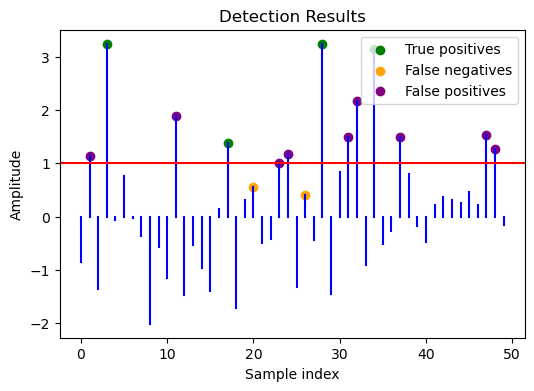

In [14]:
import h5py
import numpy as np

with h5py.File("A2a-testdata-zero-based-index.h5", "r") as file:
    #print(file.keys()) ### Find the primary key in .h5 files     
    y50 = file['testdata']['y50'][...]
    i50 = file['testdata']['i50'][...]    
    y250 = file['testdata']['y250'][...]
    i250 = file['testdata']['i250'][...]
    c50 = detectioncounts(i50,y50,1)        
    print(c50)
    fig = plot_detection(i50,y50,1)
    file.close() 
    

DetectionCounts(tp=14, fn=4, fp=24, tn=208)


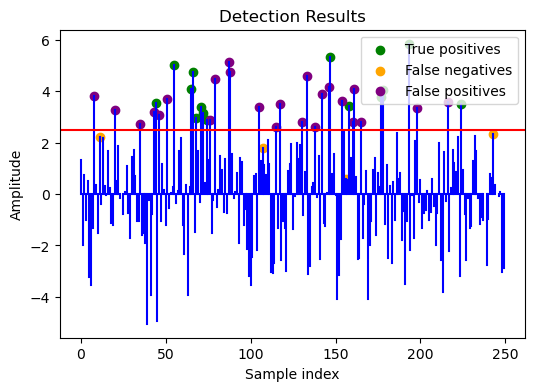

In [15]:
c250 = detectioncounts(i250,y250,2.5) 
print(c250)
fig = plot_detection(i250,y250,2.5)       

### 2c. Detection probabilities

### Question
Using either the error or signal probability distributions, what is the mathematical expression for the probability a false positive? What is it for a false negative?

### Answer
$$p(\textsf{false positive}|\textsf{signal absent}) = \int_\theta^{\infty}p(\epsilon(t))\,dt = [1 - \textsf{cdf}(\theta;\epsilon(t))]$$

$$p(\textsf{false negative}|\textsf{signal present}) = \int_{-\infty}^{\theta}p(y(t))\,dt = \textsf{cdf}(\theta;y(t))$$

A false positive is defined as a case where the test result is positive (indicating the presence of the signal), but in reality, the signal is absent. The probability of a false positive (P(FP)) can be expressed as the ratio of the number of false positive cases to the total number of cases where the signal is absent:

P(FP) = number of false positive cases / number of cases where the signal is absent

A false negative is defined as a case where the test result is negative (indicating the absence of the signal), but in reality, the signal is present. The probability of a false negative (P(FN)) can be expressed as the ratio of the number of false negative cases to the total number of cases where the signal is present:

P(FN) = number of false negative cases / number of cases where the signal is present

### Write the functions falsepos and falseneg

In [32]:
import numpy as np
from collections import namedtuple
import scipy.stats

# analytic p(fp)
def falsepos(theta = 2, alpha = 0.25, sigma = 1, noisetype = 'Gaussian'):
    fp_analytical = 1 - scipy.stats.norm.cdf(theta, 0, sigma)
    return fp_analytical

# analytic p(fn)
def falseneg(theta = 2, alpha = 0.25, A = 2, sigma = 1, noisetype = 'Gaussian'):
    fn_analytical = scipy.stats.norm.cdf(theta - A, 0, sigma) 
    return fn_analytical

# estimated_fp
def probfp(c):
    tp, fn, fp, tn = c
    estimated_fp = fp / (fp + tn)
    return estimated_fp

# estimated_fn
def probfn(c):
    tp, fn, fp, tn = c
    estimated_fn = fn / (tp + fn)
    return estimated_fn

In [33]:
import math
def errorprofig(theta, alpha, A, mu, sigma, noisetype = 'Gaussian', scale_open = False):    
    plt.figure(figsize = (6,4))
    
    #### Uniform
    if noisetype == "Uniform":
        d_noise_xleft = (mu - sigma/2) * 2
        d_noise_xright = (mu + sigma/2) * 2
        d_noise_y = 0.3
        plt.plot([d_noise_xleft, d_noise_xright], [d_noise_y, d_noise_y], color = 'b')  
        d_signal_xleft = (mu - sigma/2 + A) - 0.5
        d_signal_xright = (mu + sigma/2 + A) * 2 - 1
        d_signal_y = 0.2
        plt.plot([d_signal_xleft, d_signal_xright], [d_signal_y, d_signal_y], color = 'r')
        
        plt.axvline(theta, color='k', linestyle='--')
        plt.text(x = theta + 0.1, y = 0.31, s = "θ = "+str(theta), size = 16) 
        plt.fill_between([theta,1],d_noise_y, facecolor = 'Blue', 
                         alpha = 0.5, label = "False Positives")
        plt.fill_between([0,theta],d_signal_y, facecolor = 'red', 
                         alpha = 0.5, label = "False Positives")
        plt.show()
        return
    
    #### Critical Value
    plt.axvline(theta, color='k', linestyle='--')
    plt.text(x = theta + 0.1, y = 0.31, s = "θ = "+str(theta), size = 16)    
    #### noise pdf
    if scale_open == False:
        noise_pdf_xleft = -4
        noise_pdf_xright = 4
        noise_pdf_x = np.arange(noise_pdf_xleft, noise_pdf_xright, 0.01)
        noise_pdf_y = scipy.stats.norm.pdf(noise_pdf_x, loc = mu, scale = sigma)
        plt.plot(noise_pdf_x, noise_pdf_y, color = 'b', label = "noise pdf")
    
    if scale_open == True:
        noise_pdf_xleft = -4
        noise_pdf_xright = 4
        noise_pdf_x = np.arange(noise_pdf_xleft, noise_pdf_xright, 0.01)
        noise_pdf_y = scipy.stats.norm.pdf(noise_pdf_x, loc = mu, scale = sigma)
        plt.plot(noise_pdf_x, noise_pdf_y / 4 * 3, color = 'b', label = "noise pdf")
    
    #### signal + noise
    #### scale_open == True
    if scale_open == True:
        signal_noise_xleft = -2
        signal_noise_xright = 6
        signal_noise_x = np.arange(signal_noise_xleft, signal_noise_xright, 0.01)
        signal_noise_y = scipy.stats.norm.pdf(signal_noise_x, loc = mu + A, scale = sigma)
        plt.plot(signal_noise_x, signal_noise_y / 4, color = 'r', label = "signal + noise")
    
    if scale_open == False:
        #### signal + noise
        #### loc: mean ， scale: standard deviation 
        signal_noise_xleft = -2
        signal_noise_xright = 6
        signal_noise_x = np.arange(signal_noise_xleft, signal_noise_xright, 0.01)
        signal_noise_y = scipy.stats.norm.pdf(signal_noise_x, loc = mu + A, scale = sigma)
        plt.plot(signal_noise_x, signal_noise_y, color = 'r', label = "signal + noise")
    
    #### False Positives
    if scale_open == True:
        FP_xleft = theta
        FP_xright = noise_pdf_xright
        FP_x = np.arange(FP_xleft, FP_xright, 0.01)
        FP_y = scipy.stats.norm.pdf(FP_x, loc = mu, scale = sigma)
        plt.fill_between(FP_x, FP_y /4 * 3,facecolor = 'Blue', alpha = 0.5, label = "False Positives")
        
    if scale_open == False:    
        #### False Positives
        FP_xleft = theta
        FP_xright = noise_pdf_xright
        FP_x = np.arange(FP_xleft, FP_xright, 0.01)
        FP_y = scipy.stats.norm.pdf(FP_x, loc = mu, scale = sigma)
        plt.fill_between(FP_x, FP_y, facecolor = 'Blue', alpha = 0.5, label = "False Positives")
        
    if scale_open == True:
        #### False Negatives
        FN_xleft = signal_noise_xleft
        FN_xright = theta
        FN_x = np.arange(FN_xleft, FN_xright, 0.01)
        FN_y = scipy.stats.norm.pdf(FN_x, loc = mu + A, scale = sigma)
        plt.fill_between(FN_x, FN_y / 4, facecolor = 'Red', alpha = 0.5, label = "False Negatives")
    
    if scale_open == False:
        #### False Negatives
        FN_xleft = signal_noise_xleft
        FN_xright = theta
        FN_x = np.arange(FN_xleft, FN_xright, 0.01)
        FN_y = scipy.stats.norm.pdf(FN_x, loc = mu + A, scale = sigma)
        plt.fill_between(FN_x, FN_y, facecolor = 'Red', alpha = 0.5, label = "False Negatives")
    
    plt.legend()
    plt.show()
    
def compare_analytic_and_estimate(theta = 2, N = 1000, alpha = 0.25, A = 2, 
                                  mu = 0, sigma = 1, noisetype = 'Gaussian'):
    
    waveform, event_locations = genwaveform(N = 1000, alpha = 0.25, A = 2, 
                                            sigma = 1, noisetype = 'Gaussian')
    
    Analytic_fp = falsepos(theta)
    Analytic_fn = falseneg(theta)

    tp, fn, fp, tn = detectioncounts(event_locations, waveform, 2)
    
    estimated_fp = fp / (fp + tn)
    estimated_fn = fn / (tp + fn)

    print("Analytical False Positive Rate:", Analytic_fp)
    print("Estimated False Positive Rate:", estimated_fp)
    print("Analytical False Negative Rate:", Analytic_fn)
    print("Estimated False Negative Rate:", estimated_fn)
    ### plot error problem
    fig = errorprofig(theta, alpha, A, mu, sigma, noisetype, scale_open = False)            
    return fig

### Set  $\theta$  = 1 to test my function

Analytical False Positive Rate: 0.15865525393145707
Estimated False Positive Rate: 0.017218543046357615
Analytical False Negative Rate: 0.15865525393145707
Estimated False Negative Rate: 0.5265306122448979


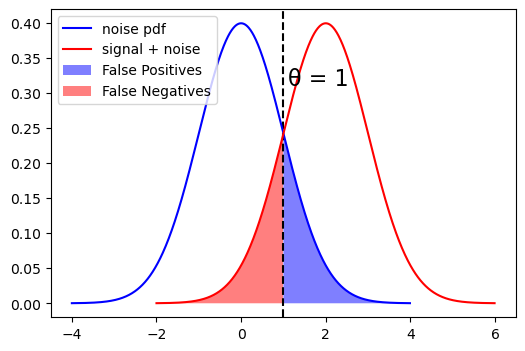

In [34]:
fig = compare_analytic_and_estimate(theta = 1)  

### Set  $\theta$  = 2 to test my function

Analytical False Positive Rate: 0.02275013194817921
Estimated False Positive Rate: 0.021080368906455864
Analytical False Negative Rate: 0.5
Estimated False Negative Rate: 0.4854771784232365


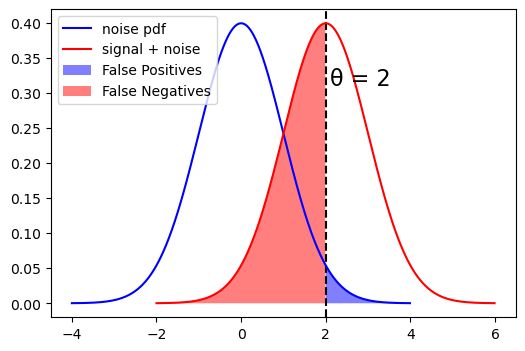

In [35]:
fig = compare_analytic_and_estimate(theta = 2)    

### Set  $\theta$  = 0 to test my function

Analytical False Positive Rate: 0.5
Estimated False Positive Rate: 0.02165087956698241
Analytical False Negative Rate: 0.022750131948179195
Estimated False Negative Rate: 0.48659003831417624


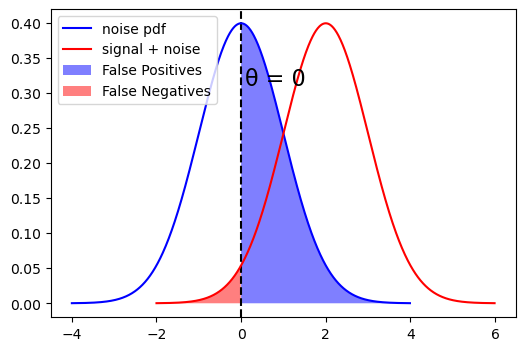

In [36]:
fig = compare_analytic_and_estimate(theta = 0)   

### Scaling the signal and noise

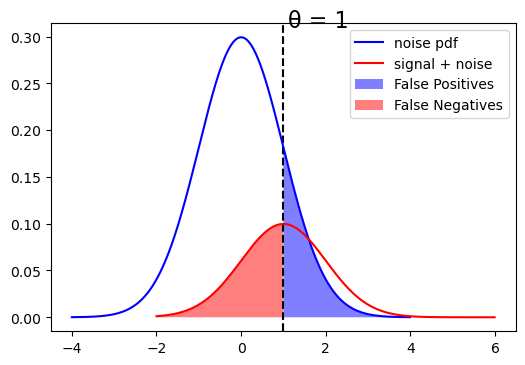

In [37]:
fig = errorprofig(theta = 1, mu = 0, sigma = 1, alpha = 0.25, A = 1, scale_open = True)

### Use reference data ("A2a-testdata.h5") to test

In [38]:
p_fp_c50 = probfp(c50)
p_fn_c50 = probfn(c50)
p_fp_c250 = probfp(c250)
p_fn_c250 = probfn(c250)
print("c50: p(fp) =", round(p_fp_c50, 4))
print("c50: p(fn) =", round(p_fn_c50, 4))
print("c250: p(fp) =", round(p_fp_c250, 4))
print("c250: p(fn) =", round(p_fn_c250, 4))

c50: p(fp) = 0.2045
c50: p(fn) = 0.3333
c250: p(fp) = 0.1034
c250: p(fn) = 0.2222


### Analysis the uniform distribution

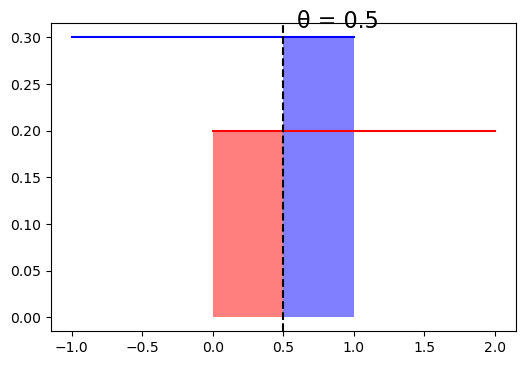

In [39]:
fig = errorprofig(theta = 0.5, alpha = 0.25, A = 1, mu = 0, sigma = 1, noisetype = 'Uniform')

## 3. ROC cures

### 3a. Threshold considerations

### Question
Explain why, in general, there is not an optimal value for the threshold.  What value minimizes the total error probability?  How is that different from minimizing the total number of errors?
### Answer
In general, there is not an optimal value for the threshold because the trade-off between false positive and false negative errors depends on the specific application and its requirements. A threshold value that minimizes the total error probability might not necessarily minimize the total number of errors, and vice versa.

Minimizing the total error probability means finding the threshold that minimizes the sum of the false positive rate and the false negative rate, often represented as P(error) = P(false positive) + P(false negative). This approach balances the two types of errors and might be suitable for applications where both false positive and false negative errors are equally harmful.

Minimizing the total number of errors means finding the threshold that minimizes the sum of the false positive count and the false negative count, often represented as N(error) = N(false positive) + N(false negative). This approach focuses on reducing the number of errors as much as possible, regardless of whether they are false positive or false negative. This might be suitable for applications where one type of error is more harmful than the other.

In summary, there is no single optimal threshold value because the best threshold depends on the specific requirements of the application and the trade-off between false positive and false negative errors. And different thresholds trade-off different types of errors. The threshold value that minimizes the total error probabilities is the point where the noise and the signal pdf intersect.

In [40]:
def compare_optimal_threshold(theta = 2, N = 1000,alpha = 0.25,A = 2,mu = 0,
                              sigma = 1,noisetype = 'Gaussian',scale = False):
    pfp = falsepos(theta, alpha, sigma, noisetype)
    pfn = falseneg(theta, alpha, A, sigma, noisetype)
    sump = pfp + pfn
    print("p(fn) =", round(pfp, 4))
    print("p(fp) =", round(pfn, 4))
    print("sump =", round(sump, 4))
    nfp = (1 - alpha) * pfp * N
    nfn = alpha * pfn * N
    totalerrors = nfp + nfn
    print("nfp =", round(nfp, 1))
    print("nfn =", round(nfn, 1))
    print("totalerrors =", round(totalerrors, 1))
    fig = errorprofig(theta, alpha, A, mu, sigma, noisetype, scale_open = scale)
    return fig     

### Minimizing probability of error

p(fn) = 0.1841
p(fp) = 0.1357
sump = 0.3197
nfp = 138.0
nfn = 33.9
totalerrors = 172.0


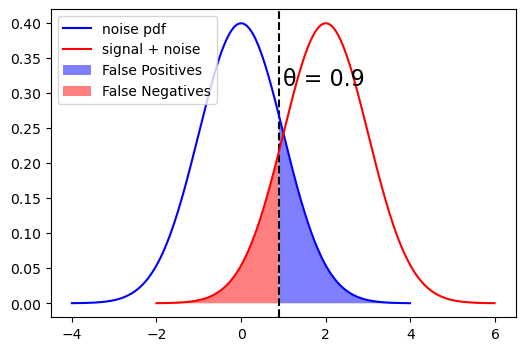

In [41]:
theta = 0.9
fig = compare_optimal_threshold(theta = 0.9, alpha = 0.25,A = 2,mu = 0,sigma = 1,
                                noisetype = 'Gaussian',scale = False)

p(fn) = 0.1587
p(fp) = 0.1587
sump = 0.3173
nfp = 119.0
nfn = 39.7
totalerrors = 158.7


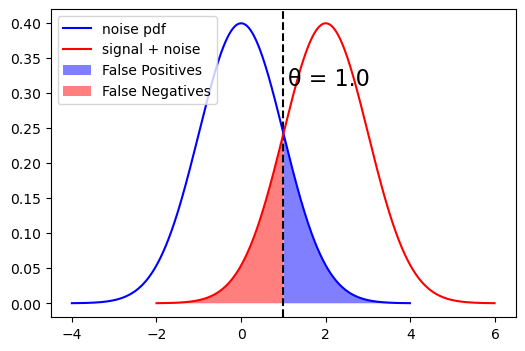

In [42]:
theta = 1.0
fig = compare_optimal_threshold(theta, alpha = 0.25,A = 2,mu = 0,sigma = 1,
                                noisetype = 'Gaussian',scale = False)

p(fn) = 0.1357
p(fp) = 0.1841
sump = 0.3197
nfp = 101.7
nfn = 46.0
totalerrors = 147.8


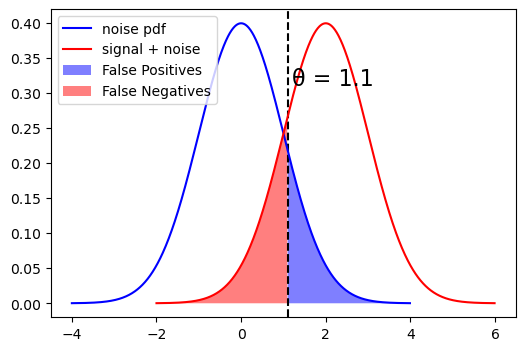

In [43]:
theta = 1.1
fig = compare_optimal_threshold(theta, alpha = 0.25,A = 2,mu = 0,
                                sigma = 1,noisetype = 'Gaussian',scale = False)

p(fn) = 0.1056
p(fp) = 0.2266
sump = 0.3323
nfp = 79.2
nfn = 56.7
totalerrors = 135.9


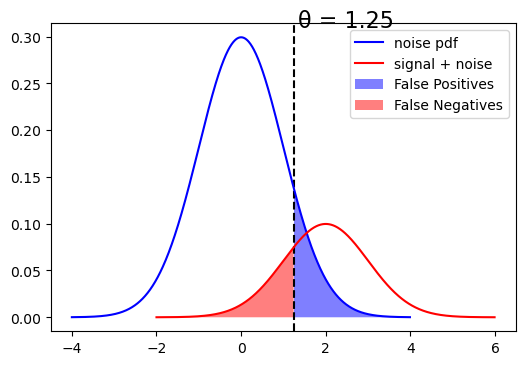

In [44]:
theta = 1.25
fig = compare_optimal_threshold(theta, alpha = 0.25,A = 2,mu = 0,sigma = 1,
                                noisetype = 'Gaussian',scale = True)

p(fn) = 0.0668
p(fp) = 0.3085
sump = 0.3753
nfp = 50.1
nfn = 77.1
totalerrors = 127.2


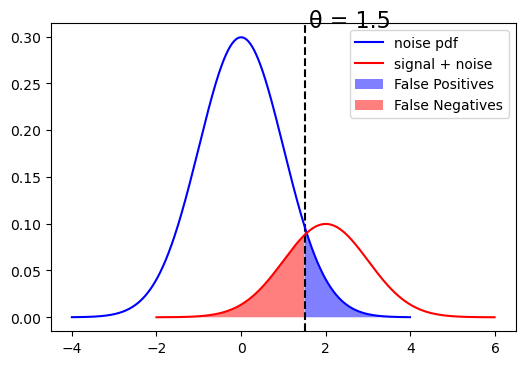

In [45]:
theta = 1.5
fig = compare_optimal_threshold(theta, alpha = 0.25,A = 2,mu = 0,
                                sigma = 1,noisetype = 'Gaussian',scale = True)

p(fn) = 0.0401
p(fp) = 0.4013
sump = 0.4414
nfp = 30.0
nfn = 100.3
totalerrors = 130.4


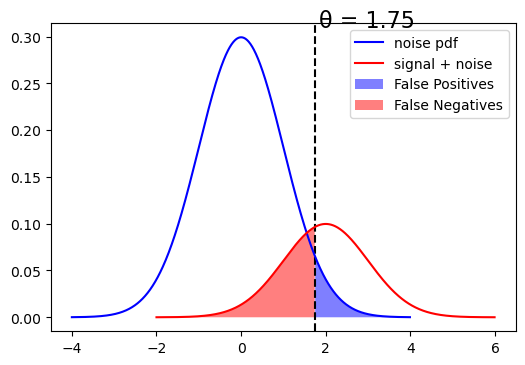

In [83]:
theta = 1.75
fig = compare_optimal_threshold(theta, alpha = 0.25,A = 2,mu = 0,
                                sigma = 1,noisetype = 'Gaussian',scale = True)

#### For Gaussian signals and noise the optimal threshold can be calculated analyticaly

$$\theta_(opt) = \frac{\mu+A}{2}+\frac{\sigma^2}{A-\mu}\log\frac{(1-\alpha)}{\alpha}$$

In [46]:
def opt_cal(alpha, A, mu, sigma):
    opt = (mu + A) / 2 + sigma * sigma / (A - mu) * math.log((1 - alpha) / alpha)
    return opt

In [47]:
sigma_opt = opt_cal(alpha = 0.25, A = 2, mu = 0, sigma = 1)
print("sigma_opt =", sigma_opt)
print("This outcome can agree with our manual estimate!")

sigma_opt = 1.549306144334055
This outcome can agree with our manual estimate!


### 3b. ROC plot

Write a function `plotROC` to plot the ROC curve using the functions above.  It should use a similar parameter convention.

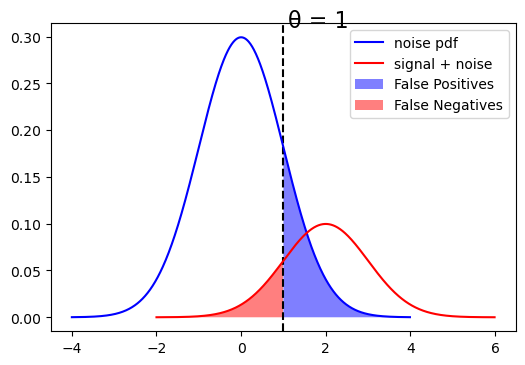

In [48]:
fig = errorprofig(alpha = 0.25, A = 2, mu = 0, sigma = 1, 
                  noisetype = "Gaussian", theta = 1, scale_open = True)

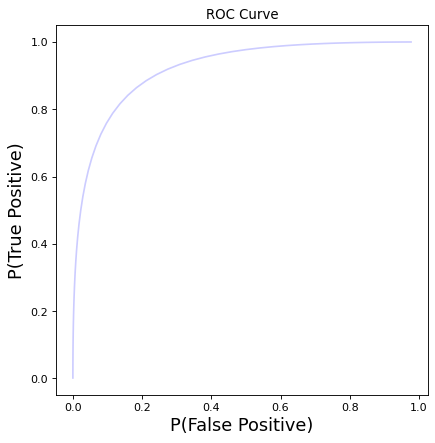

In [15]:
import A2a_zxc701_package
A2a_zxc701_package.plotROC(A=2, alpha=0.25)    